#Elantra Sales using Linear Regression

##Load and look at the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

In [2]:
data = r'C:\Users\neil\Downloads\elantra.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
0,1,2010,7690,9.7,153,213.377,217.466
1,1,2011,9659,9.1,259,229.353,221.082
2,1,2012,10900,8.2,354,244.178,227.666
3,1,2013,12174,7.9,230,242.560,231.321
4,1,2014,15326,6.6,232,247.575,234.933


In [5]:
df.info()
df['Month'].min()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 7 columns):
Month           50 non-null int64
Year            50 non-null int64
ElantraSales    50 non-null int64
Unemployment    50 non-null float64
Queries         50 non-null int64
CPI_energy      50 non-null float64
CPI_all         50 non-null float64
dtypes: float64(3), int64(4)
memory usage: 3.1 KB


1

In [6]:
##Create train and test set

In [7]:
train = df.query('Year <2013')
test = df.query('Year > 2012')

In [8]:
##Look at the relationship between the data

(215, 240)

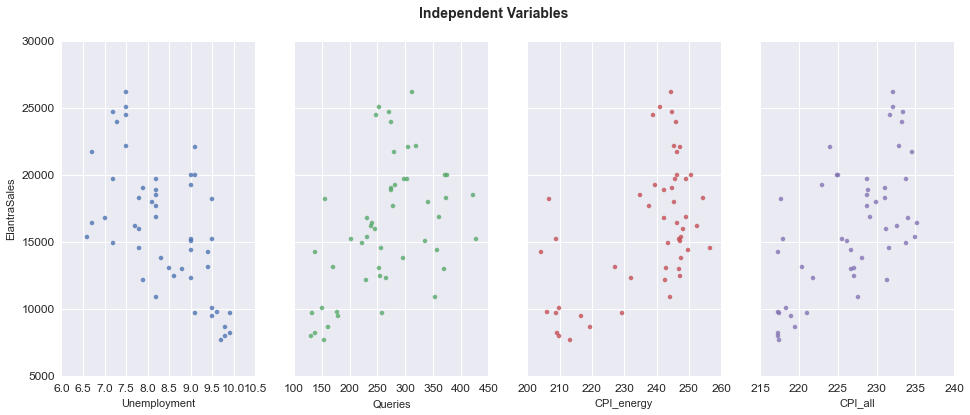

In [9]:
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12

f, (ax) = plt.subplots(1,4, figsize =(16,6),sharey=True)
f.suptitle('Independent Variables', fontsize=14, fontweight='bold')
sns.regplot(x ='Unemployment', y ='ElantraSales',data = df,ci=None, ax =ax[0],fit_reg= False)
sns.regplot('Queries','ElantraSales',data = df,ci=None, ax =ax[1],fit_reg= False).set_ylabel("")
sns.regplot('CPI_energy','ElantraSales',data = df,ci=None, ax =ax[2],fit_reg= False).set_ylabel("")
g = sns.regplot('CPI_all','ElantraSales',data = df,ci=None, ax =ax[3],fit_reg= False)
g.set_ylabel("")
axes = g.axes
axes.set_xlim(215,240)

##Create model with all Independent values

In [10]:
from sklearn.linear_model import LinearRegression
feature_cols = ['Unemployment','Queries','CPI_energy','CPI_all']
X_train = train[feature_cols]
y_train = train['ElantraSales'].values

lm1 = LinearRegression()

lm1.fit(X_train,y_train)

lm1pred = lm1.predict(X_train)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 48
Data columns (total 4 columns):
Unemployment    36 non-null float64
Queries         36 non-null int64
CPI_energy      36 non-null float64
CPI_all         36 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1.4 KB


###Create function to calculate R^2 adjusted

In [12]:
def rsquared_adj(x,rsquared):
    N = len(x)
    predictors = len(list(x))
    return 1- ((1-rsquared)*(N-1))/(N-predictors-1)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print 'R^2: ', lm1.score(X_train,y_train)
print 'R^2 Adj: ', rsquared_adj(X_train,lm1.score(X_train,y_train))
print 'MAE: ', mean_absolute_error(lm1pred,y_train)
print 'MSE: ', mean_squared_error(lm1pred,y_train)
print 'RMSE: ', np.sqrt(mean_squared_error(lm1pred,y_train)),'\n'

#Coefficents
for i in zip(feature_cols,lm1.coef_):
    print "{0} : {1}".format(i[0],i[1])

R^2:  0.428156766861
R^2 Adj:  0.35437054323
MAE:  2495.9605879
MSE:  9346383.72112
RMSE:  3057.18558827 

Unemployment : -3179.89957338
Queries : 19.0296826199
CPI_energy : 38.5060368546
CPI_all : -297.645625601


##Model does not fit that good
###Add Month column as a factor

In [14]:
#Convert Month column to a factor
#First replace the numbers with the Month names
#Note: We can convert the ints to factors however I prefer to use the month name instead(its just preference)
MonthDict = {
             1 : 'Jan', 2 :'Feb' ,3 : 'Mar', 4 : 'Apr' , 5 : 'May', 6 : 'June' ,7 : 'July',
             8 : 'Aug',9 : 'Sep',10 : 'Oct' ,11 : 'Nov', 12 : 'Dec'
            }

df['MonthFac'] = df['Month'].apply(lambda x: MonthDict.get(x,x)).astype('category')

#Recreate test and train with category variable
train = df.query('Year <2013')
test = df.query('Year > 2012')

###Recreate model with MonthFac added on

In [15]:
feature_cols2 = ['Unemployment','Queries','CPI_energy','CPI_all']

X_train2 = pd.concat([train[feature_cols2],pd.get_dummies(train['MonthFac'])], axis = 1)
lm2 = LinearRegression()

lm2.fit(X_train2,y_train) #same y do not need to change

lm2pred = lm2.predict(X_train2)

In [16]:
print 'R^2: ', lm2.score(X_train2,y_train)
print 'R^2 Adj: ', rsquared_adj(X_train2,lm2.score(X_train2,y_train))
print 'MAE: ', mean_absolute_error(lm2pred,y_train)
print 'MSE: ', mean_squared_error(lm2pred,y_train)
print 'RMSE: ', np.sqrt(mean_squared_error(lm2pred,y_train)),'\n'

modelcoef = zip(list(X_train2),lm2.coef_)
#lets look at Coefficents
for i in modelcoef:
    print "{0} : {1}".format(i[0],i[1])

R^2:  0.819264200602
R^2 Adj:  0.667065632688
MAE:  1421.79007159
MSE:  2954002.13804
RMSE:  1718.72107628 

Unemployment : -7739.38143327
Queries : -4.76364624716
CPI_energy : 288.631413065
CPI_all : -1343.3068286
Apr : 1968.318375
Aug : 2351.15842902
Dec : -294.378270044
Feb : -3333.29119298
Jan : -5588.28900457
July : 4341.17542147
June : 3627.54360053
Mar : 1108.26775928
May : 1831.95998914
Nov : -2349.35749966
Oct : -3088.10525166
Sep : -575.002355524


##Look at multicollinearity between the variables

In [17]:
train.drop(['Year'],axis=1).corr()

,Month,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
Month,1.000000,0.109795,-0.203603,0.015844,0.176020,0.266788
ElantraSales,0.109795,1.000000,-0.567146,0.610065,0.591649,0.593622
Unemployment,-0.203603,-0.567146,1.000000,-0.641109,-0.800719,-0.956212
Queries,0.015844,0.610065,-0.641109,1.000000,0.832838,0.753673
CPI_energy,0.176020,0.591649,-0.800719,0.832838,1.000000,0.913226
CPI_all,0.266788,0.593622,-0.956212,0.753673,0.913226,1.000000


In [19]:
#Queries looks to be highly correlated with CPI_enery and CPI_all
#Also its coefficent is negative which goes against common sense(more queries one would expect a positive coefficent) 
#Remove Queries and rebuild the model
feature_cols3 = ['Unemployment','CPI_energy','CPI_all']
X_train3 = pd.concat([train[feature_cols3],pd.get_dummies(train['MonthFac'])], axis = 1)

lm3 = LinearRegression()


lm3.fit(X_train3,y_train) #same y do not need to change

lm3pred = lm3.predict(X_train3)

In [20]:
print 'R^2: ', lm3.score(X_train3,y_train)
print 'R^2 Adj: ', rsquared_adj(X_train3,lm3.score(X_train3,y_train))
print 'MAE: ', mean_absolute_error(lm3pred,y_train)
print 'MSE: ', mean_squared_error(lm3pred,y_train)
print 'RMSE: ', np.sqrt(mean_squared_error(lm3pred,y_train)),'\n'

modelcoef = zip(list(X_train3),lm3.coef_)
#lets look at Coefficents
for i in modelcoef:
    print "{0} : {1}".format(i[0],i[1])

R^2:  0.818039123829
R^2 Adj:  0.681568466701
MAE:  1409.91907409
MSE:  2974025.17398
RMSE:  1724.53621997 

Unemployment : -7971.33951586
CPI_energy : 268.02991583
CPI_all : -1377.58162061
Apr : 2006.9281588
Aug : 2229.06913329
Dec : -47.2395851706
Feb : -3279.51621927
Jan : -5690.42988756
July : 3912.29219432
June : 3532.70444639
Mar : 1189.65694011
May : 1754.21484165
Nov : -2025.35342351
Oct : -2966.18770741
Sep : -616.138891627


##Our Model is much better now lets
###Predict y values for the test set now

In [61]:
X_test = pd.concat([test[feature_cols3],pd.get_dummies(test['MonthFac'])], axis = 1)
y_test = test['ElantraSales'].values
lm3predtest = lm3.predict(X_test)

#len(lm3predtest)
X_test

,Unemployment,CPI_energy,CPI_all,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
3,7.9,242.560,231.321,0,0,0,0,1,0,0,0,0,0,0,0
4,6.6,247.575,234.933,0,0,0,0,1,0,0,0,0,0,0,0
8,7.7,252.639,232.599,0,0,0,1,0,0,0,0,0,0,0,0
9,6.7,246.389,235.169,0,0,0,1,0,0,0,0,0,0,0,0
13,7.5,244.598,232.075,0,0,0,0,0,0,0,1,0,0,0,0
17,7.5,238.860,231.707,1,0,0,0,0,0,0,0,0,0,0,0
21,7.5,240.972,232.124,0,0,0,0,0,0,0,0,1,0,0,0
25,7.5,245.412,232.860,0,0,0,0,0,0,1,0,0,0,0,0
29,7.3,245.926,233.252,0,0,0,0,0,1,0,0,0,0,0,0
33,7.2,244.917,233.433,0,1,0,0,0,0,0,0,0,0,0,0


In [62]:
#Rsquared for test
SSE = sum((lm3predtest-test['ElantraSales'])**2)
SST = sum((train['ElantraSales'].mean()-y_test)**2)

print SSE, SST

Rsquared = 1-(SSE/SST)


190757747.444 701375142.375


In [29]:
print 'R^2: ', Rsquared
print 'MAE: ', mean_absolute_error(lm3predtest,y_test)
print 'MSE: ', mean_squared_error(lm3predtest,y_test)
print 'RMSE: ', np.sqrt(mean_squared_error(lm3predtest,y_test))

R^2:  0.728023227629
MAE:  2851.3634544
MSE:  13625553.3889
RMSE:  3691.28072475


##Lets Predict actual future sales!
###Lets look at what Year/month we have the latest sales for

In [80]:
df.sort(['Year','Month'], ascending = [0,0]).head()

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all,MonthFac
9,2,2014,16393,6.7,240,246.389,235.169,Feb
4,1,2014,15326,6.6,232,247.575,234.933,Jan
49,12,2013,21692,6.7,279,246.189,234.594,Dec
45,11,2013,16751,7.0,231,242.301,234.033,Nov
41,10,2013,14876,7.2,223,243.374,233.782,Oct


In [81]:
#hmm Feb, 2014... brb seeing if I can find sales and the independent variable data for months after March on the web

###We are going to try and predict Elantra sales for March 2014 to Feb 2014
###Download the unemployment percentage http://data.bls.gov/timeseries/LNS14000000
###Download CPI_All from here http://data.bls.gov/cgi-bin/surveymost?cu check the CUUR0000SA0 and download
###Download CPI_Energy https://research.stlouisfed.org/fred2/series/CPIENGSL/

In [87]:
test2 = pd.read_csv("C:\Users\Neil\Downloads\ElantraSales14-15.csv")
#Recreate factor on month
test2['MonthFac'] = test2['Month'].apply(lambda x: MonthDict.get(x,x)).astype('category')

In [90]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 6 columns):
Month           12 non-null int64
Year            12 non-null int64
Unemployment    12 non-null float64
CPI_Energy      12 non-null float64
CPI_all         12 non-null float64
MonthFac        12 non-null category
dtypes: category(1), float64(3), int64(2)
memory usage: 636.0 bytes


In [88]:
#Your dataframe should look like this
test2

,Month,Year,Unemployment,CPI_Energy,CPI_all,MonthFac
0,3,2014,6.6,247.301,236.293,Mar
1,4,2014,6.2,247.035,237.072,Apr
2,5,2014,6.3,248.862,237.900,May
3,6,2014,6.1,250.194,238.343,June
4,7,2014,6.2,249.755,238.250,July
5,8,2014,6.1,245.612,237.852,Aug
6,9,2014,5.9,243.843,238.031,Sep
7,10,2014,5.7,240.863,237.433,Oct
8,11,2014,5.8,230.897,236.151,Nov
9,12,2014,5.6,220.070,234.812,Dec


In [91]:
X_test2 = pd.concat([test2.iloc[:,2:5],pd.get_dummies(test2['MonthFac'])],axis =1)


lm3predtest2 = lm3.predict(X_test2)

In [94]:
#add to Dataframe
test2['PredElantraSales'] = lm3predtest2.astype(int)

In [95]:
test2.head()

,Month,Year,Unemployment,CPI_Energy,CPI_all,MonthFac,PredElantraSales
0,3,2014,6.6,247.301,236.293,Mar,20749
1,4,2014,6.2,247.035,237.072,Apr,23610
2,5,2014,6.3,248.862,237.900,May,21910
3,6,2014,6.1,250.194,238.343,June,25029
4,7,2014,6.2,249.755,238.250,July,24622


In [100]:
#Lets graph the actual sales we have and the sales for the out of sample
df['Date'] =  pd.to_datetime(df['Year'].astype(str) + df['Month'].astype(str),format = "%Y%m")
test2['Date'] = pd.to_datetime(test2['Year'].astype(str) + test2['Month'].astype(str),format = "%Y%m")
#df.index=pd.to_datetime(df.Y+df.M+df.D,format="%Y%m%d")

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 9 columns):
Month           50 non-null int64
Year            50 non-null int64
ElantraSales    50 non-null int64
Unemployment    50 non-null float64
Queries         50 non-null int64
CPI_energy      50 non-null float64
CPI_all         50 non-null float64
MonthFac        50 non-null category
Date            50 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(3), int64(4)
memory usage: 3.6 KB


In [142]:
df.sort(['Year','Month'], ascending = [1,1], inplace = True)

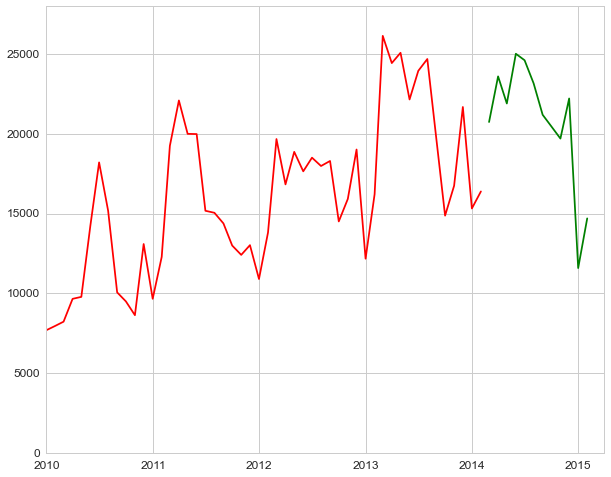

In [143]:
plt.figure(figsize=(10,8)) 
plt.plot(df['Date'], df['ElantraSales'], 'r', test2['Date'], test2['PredElantraSales'], 'g')
plt.axis([df['Date'].min(), pd.to_datetime('2015-04-01'),0,28000])
plt.show()